In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydotplus import graph_from_dot_data

In [32]:
df = pd.read_csv('../data/buy.csv') #读取csv数据

df

,review,discount,needed,shipping,buy
0,3,3,0,1,1
1,3,3,0,0,1
2,2,3,0,1,0
3,1,2,0,1,0
4,1,1,1,1,0
5,1,1,1,0,1
6,2,1,1,0,0
7,3,2,0,1,1
8,3,1,1,1,0
9,1,2,1,1,0


In [33]:
X = df.iloc[:,0:4]  #取df的前4列为X变量
y = df['buy'] #设置y变量

# 把X、y转化为数组形式，以便于计算
X = np.array(X.values)  
y = np.array(y.values)

In [34]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [35]:
tree_ID3 = DecisionTreeClassifier(criterion='entropy') 
#默认采用的是gini，即是cart算法，在这里通过entropy设置ID3算法
tree_ID3 = tree_ID3.fit(X, y) #采用ID3算法进行训练
tree_ID3 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
y_pred =tree_ID3.predict(X) #对测试集进行预测

y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [37]:
accuracy_score(y, y_pred)  #计算准确率

1.0

In [38]:
confusion_matrix(y_true=y, y_pred=y_pred)  #计算混淆矩阵

array([[8, 0],
       [0, 6]], dtype=int64)

In [39]:
feature_names = list(df.columns[:-1]) #得到前5列列标签并转化为list形式
target_names = ['0','1'] #创建目标变量的类别名称

feature_names #展示列标签，即分裂属性

['review', 'discount', 'needed', 'shipping']

In [40]:
dot_data = StringIO()  #将对象写入内存中
#生成决策树结构
export_graphviz(tree_ID3,out_file = dot_data,feature_names=feature_names,
                     class_names=target_names,filled=True,rounded=True,
                     special_characters=True)
#生成决策树图形
graph = graph_from_dot_data(dot_data.getvalue())
#将图形以pdf文件的形式导出
graph.write_pdf("../data/BuyTree.pdf")
'''
https://blog.csdn.net/wuchangi/article/details/79589542
https://blog.csdn.net/qq_41577045/article/details/79844709
http://sklearn.apachecn.org/cn/0.19.0/modules/tree.html#tree-algorithms
'''

'\nhttps://blog.csdn.net/wuchangi/article/details/79589542\nhttps://blog.csdn.net/qq_41577045/article/details/79844709\nhttp://sklearn.apachecn.org/cn/0.19.0/modules/tree.html#tree-algorithms\n'

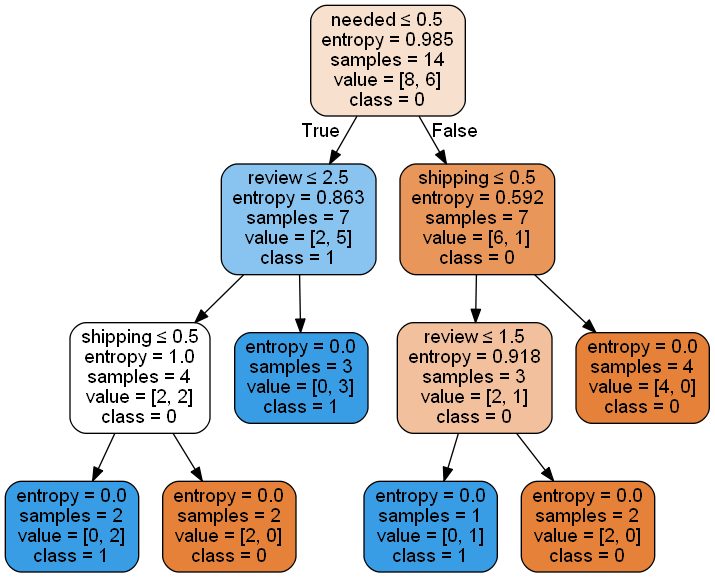

In [41]:
dot_data = StringIO()  #将对象写入内存中
#生成决策树结构
export_graphviz(tree_ID3,out_file = dot_data,feature_names=feature_names, class_names=target_names,filled=True,rounded=True, special_characters=True)
#生成决策树图形
graph = graph_from_dot_data(dot_data.getvalue())     
Image(graph.create_png()) #生成图形并展示出来

In [42]:
tree_CART = DecisionTreeClassifier() #设置CART算法
tree_CART = tree_CART.fit(X, y) #采用ID3算法进行训练

tree_CART

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
y_pred_CART =tree_CART.predict(X) #对测试集进行预测

y_pred_CART

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [44]:
accuracy_score(y, y_pred_CART)  #计算准确率

1.0

In [45]:
confusion_matrix(y_true=y, y_pred=y_pred_CART)  #计算混淆矩阵

array([[8, 0],
       [0, 6]], dtype=int64)

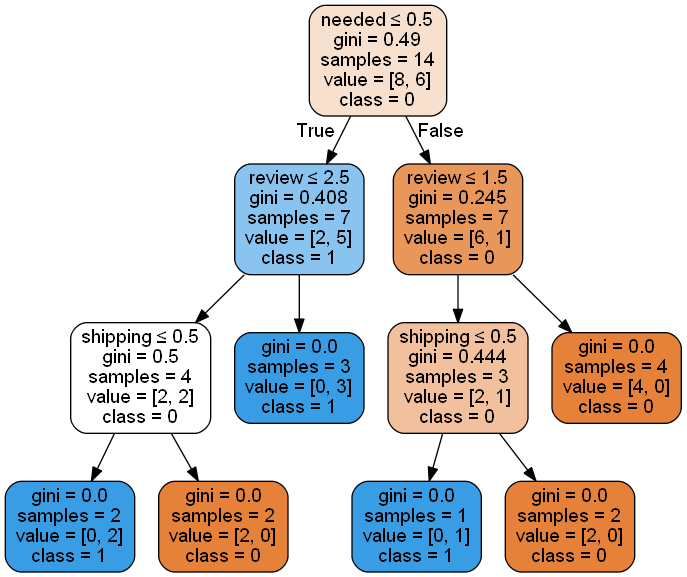

In [46]:
dot_data = StringIO()  #将对象写入内存中
#生成决策树结构
export_graphviz(tree_CART,out_file = dot_data,feature_names=feature_names, class_names=target_names,filled=True,rounded=True, special_characters=True)
#生成决策树图形
graph = graph_from_dot_data(dot_data.getvalue())     
Image(graph.create_png()) #生成图形并展示出来

In [48]:
tree_CART_prun = DecisionTreeClassifier(max_depth = 2) #设置CART算法
tree_CART_prun = tree_CART_prun.fit(X, y) #采用ID3算法进行训练

tree_CART_prun

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

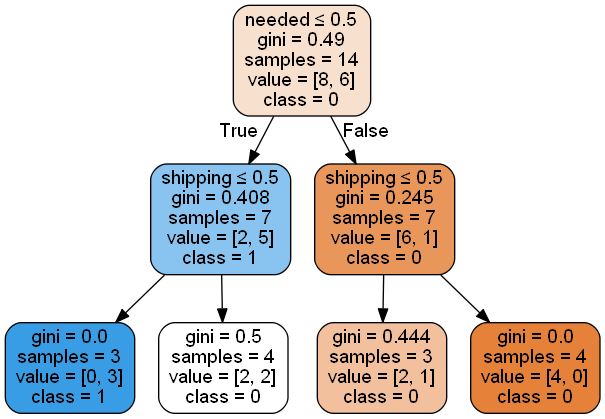

In [50]:
dot_data = StringIO()  #将对象写入内存中
#生成决策树结构
export_graphviz(tree_CART_prun,out_file = dot_data,feature_names=feature_names, class_names=target_names,filled=True,rounded=True, special_characters=True)
#生成决策树图形
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) #生成图形并展示出来

In [51]:
y_pred_prun =tree_CART_prun.predict(X) #对测试集进行预测
accuracy_score(y, y_pred_prun)  #计算准确率

0.7857142857142857